## Advanced Regression Assignment

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
from numpy import log
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score

C:\Users\parri\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Step 1: Data Understanding and Inspection

In [2]:
# Reading dataset and inspecting various variables.
house = pd.read_csv('train.csv')
print(house.shape)
house.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Inspecting the variable datatypes
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Classifying categorical and numerical columns 
categ = []
numeric = []
for i in list(house):
    if house[i].dtypes == 'object':
        categ.append(i)  
    else:
        numeric.append(i)
print('Categorical:\n',categ)
print('Numerical:\n',numeric)

Categorical:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'Woo

In [5]:
house.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

**A few observations:**

--> There are 43 categorical columns and 38 numerical columns.

--> A lot of missing values can be seen in the above table.


### Step 2: Data Visualization and EDA

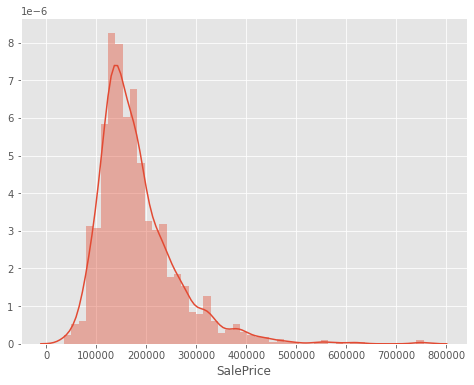

In [6]:
plt.figure(figsize=(8,6))
sns.distplot(house.SalePrice)

The target variable 'SalePrice' has a right skewed distribution.

Let's look at some columns and do an analysis.

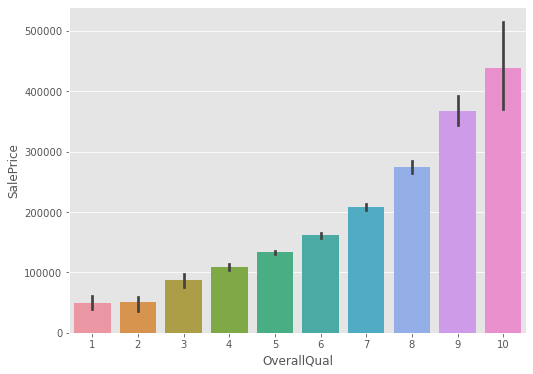

In [7]:
# Plotting 'SalePrice' vs 'OverallQual'
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.barplot(x = 'OverallQual', y = 'SalePrice', data = house)

'OverallQual' has a linear relationship with 'SalePrice'. The price increases as the overall quality increases.

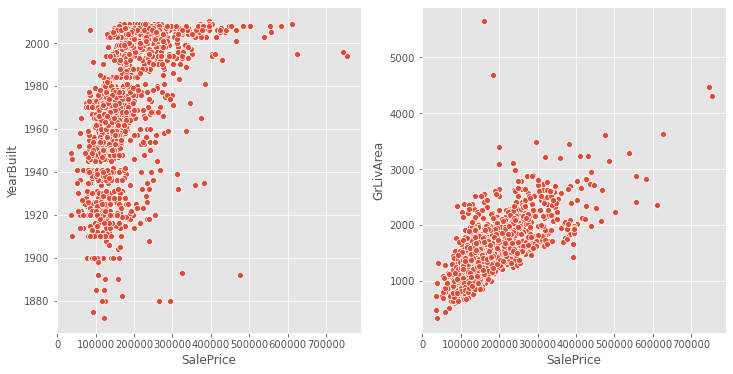

In [8]:
# Plotting 'YearBuilt' and 'GrLivArea' against 'SalePrice'
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x = 'SalePrice', y = 'YearBuilt', data = house)
plt.subplot(1,2,2)
sns.scatterplot(x = 'SalePrice', y = 'GrLivArea', data = house)

'YearBuilt' is colinear and 'GrLivArea' highly colinear with 'SalePrice'. So, the SalePrice slightly depends upon how new the house is. Also, higher the ground living area, higher the 'SalePrice'.

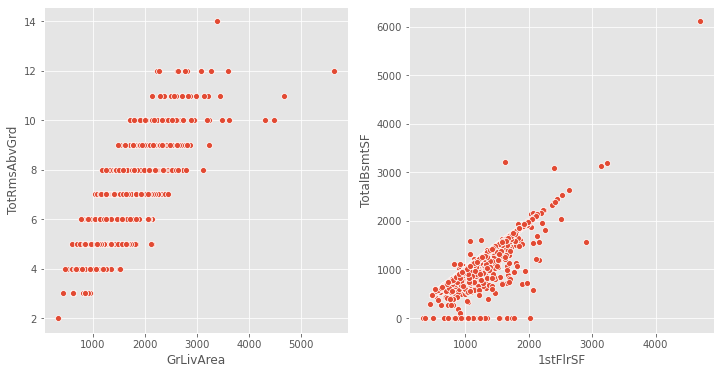

In [9]:
# Plotting highly colinear variables 'GrLivArea' vs 'TotRmsAbvGrd' and '1stFlrSF' vs 'TotalBsmtSF'
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x = 'GrLivArea', y = 'TotRmsAbvGrd', data = house)
plt.subplot(1,2,2)
sns.scatterplot(x = '1stFlrSF', y = 'TotalBsmtSF', data = house)

In [10]:
# Looking at the correlation matrix
house.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [11]:
# Looking at some highly correlated variables.
corr_matrix = house.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_var = [column for column in upper.columns if any(upper[column] > 0.60)]
corr_var

['1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

### Step 3: Data Cleaning

In [12]:
# Checking for duplicates and null values
print(sum(house.duplicated(subset = 'Id')))

0


In [13]:
# Looking at the percentage of missing values
round(100*(house.isnull().sum()/len(house.index)),2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

There are a few columns with very high number of missing values ('PoolQC','MiscFeature','Alley','Fence'). These variables can be dropped.

In [14]:
# Let's look at the columns with significant number of missing values
house.FireplaceQu.value_counts()/house.FireplaceQu.value_counts().sum() * 100

Gd    49.350649
TA    40.649351
Fa     4.285714
Ex     3.116883
Po     2.597403
Name: FireplaceQu, dtype: float64

It's most likely that the missing values represent the houses with no fireplace. So, Let's impute these missing values and make a new category called 'No_Fireplace'.

In [15]:
# Imputing missing values with 'No_Fireplace'
house.FireplaceQu.fillna('No_Fireplace',inplace = True)
house.FireplaceQu.value_counts()/house.FireplaceQu.value_counts().sum() * 100

No_Fireplace    47.260274
Gd              26.027397
TA              21.438356
Fa               2.260274
Ex               1.643836
Po               1.369863
Name: FireplaceQu, dtype: float64

In [16]:
# Imputing missing values with the column median
house.LotFrontage.fillna((house.LotFrontage.median()), inplace = True)

Now let's impute the missing values and make a new category called 'No_Garage' in 'GarageType','GarageFinish','GarageCond' and 'GarageQual'. Let's also impute the missing values of 'BsmtExposure','BsmtFinType2', 
'BsmtFinType1','BsmtCond' and 'BsmtQual'.

In [17]:
# Imputing missing values with 'No_Garage'
for i in ['GarageType','GarageFinish','GarageCond','GarageQual']:
    house[i].fillna('No_Garage',inplace = True)
house.GarageType.value_counts()/house.GarageType.value_counts().sum() * 100

Attchd       59.589041
Detchd       26.506849
BuiltIn       6.027397
No_Garage     5.547945
Basment       1.301370
CarPort       0.616438
2Types        0.410959
Name: GarageType, dtype: float64

In [18]:
# Imputing missing values with 'No_Basement'
for i in ['BsmtExposure','BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual']:
    house[i].fillna('No_Basement',inplace = True)
house.BsmtExposure.value_counts()/house.BsmtExposure.value_counts().sum() * 100

No             65.273973
Av             15.136986
Gd              9.178082
Mn              7.808219
No_Basement     2.602740
Name: BsmtExposure, dtype: float64

Column 'GarageYrBlt' has the built year of the garage. We decide to drop this column as it is not very relevant to the model.

The remaining columns have very small percentage(~1%) of missing values. Let's impute these values with the median and mode of the columns.

In [19]:
house.drop('GarageYrBlt', axis = 1, inplace = True)
# Imputing remaining % of missing values
house.MasVnrArea.fillna(house.MasVnrArea.median(), inplace=True)
house.MasVnrType.fillna(house.MasVnrType.mode()[0], inplace=True)
house.Electrical.fillna(house.Electrical.mode()[0], inplace=True)

In [20]:
round(100*(house.isnull().sum()/len(house.index)),2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
SalePrice         0.00
ExterCond         0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.00
ExterQual         0.00
BsmtQual          0.00
Foundation        0.00
YearBuilt         0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
YearRemodAdd      0.00
HouseStyle        0.00
OverallCond       0.00
OverallQual       0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage       0.00
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
BsmtUnfSF         0.00
BsmtFinSF2        0.00
Heating           0.00
TotalBsmtSF       0.00
OpenPorchSF

In [21]:
# Let's check for the skewness of categorical variables.
for i in categ:
    print(house[i].value_counts()/house[i].value_counts().sum() * 100)
    print('\n')

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64


Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64


Grvl    54.945055
Pave    45.054945
Name: Alley, dtype: float64


Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64


Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64


AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64


Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64


Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64


NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.97

In [22]:
# Let's drop the highly skewed variables and columns with very high % of missing values.
house.drop('Id', axis = 1, inplace = True)
house.drop(['Street','Utilities','Condition2','RoofMatl','Heating','LandContour','LandSlope','BsmtCond','BsmtFinType2','Electrical','Functional','GarageQual','GarageCond','PoolQC','MiscFeature','Alley','Fence'], axis = 1, inplace = True)
print(house.shape)

(1460, 62)


### Step 4: Data Preparation

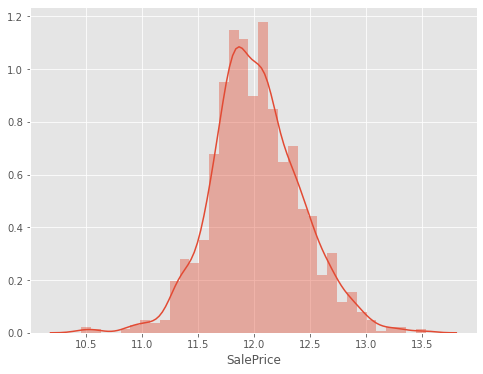

In [23]:
# Transforming the right skewed distribution to normal distribution (using log transform).
house['SalePrice'] = np.log(house['SalePrice'] + 1)
plt.figure(figsize=(8,6))
sns.distplot(house.SalePrice)

In [24]:
# Creating another feature 'Age' and 'Age_post_remodel' using the year columns
house["Age"] = 2020 - house['YearBuilt']
house["Age_post_remodel"] = 2020 - house['YearRemodAdd']
house.drop(['YearRemodAdd', 'YearBuilt'], axis = 1, inplace = True)


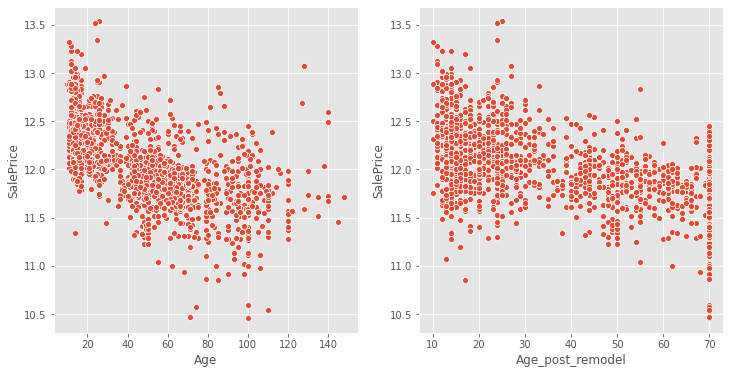

In [25]:
# Plotting new features vs 'SalePrice'
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x = 'Age', y = 'SalePrice', data = house)
plt.subplot(1,2,2)
sns.scatterplot(x = 'Age_post_remodel', y = 'SalePrice', data = house)

#### Conversion of binary variables from (Yes/No) to 0/1



In [26]:
# Mapping variable 'CentralAir'
var_list =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, 'N': 0})

house[var_list] = house[var_list].apply(binary_map)
house[var_list].head()

,CentralAir
0,1
1,1
2,1
3,1
4,1


**Dummy Variables**

In [27]:
cat = []
numer= []
for i in list(house):
    if house[i].dtypes == 'object':
        cat.append(i)
    else:
        numer.append(i)

In [28]:
# Creating dummy variables for categorical variables
dummy = pd.get_dummies(house[cat], drop_first=True)

# Adding the results to the dataframe
house = pd.concat([house, dummy], axis=1)
house.shape

(1460, 215)

**Dropping the redundant variables**

In [29]:
# Dropping the original variables as we have created their dummies
house = house.drop(cat, axis = 1)
house.shape

(1460, 190)

In [30]:
house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age,Age_post_remodel,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,...,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,1,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,12.247699,17,17,0,0,1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,12.109016,44,44,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,1,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,12.317171,19,18,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,1,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,11.849405,105,50,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,12.429220,20,20,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


### Step 5: Feature Scaling

In [31]:
# Let's scale the numerical variables
scaler = StandardScaler()
numer.remove('SalePrice')
house[numer] = scaler.fit_transform(house[numer])
house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age,Age_post_remodel,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,...,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,0.514104,0.575425,-0.288653,-0.944591,-0.459303,0.263813,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,12.247699,-1.050994,-0.878668,0,0,1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.263813,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,12.109016,-0.156734,0.429577,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.325915,0.092907,-0.288653,-0.301643,-0.313369,0.263813,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,12.317171,-0.984752,-0.830215,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,0.263813,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,11.849405,1.863632,0.720298,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,1.366489,0.463568,-0.288653,-0.174865,0.199680,0.263813,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,12.429220,-0.951632,-0.733308,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


### Step 6: Test-Train Split

In [32]:
# Putting feature variables to x
X = house.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age,Age_post_remodel,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,0.514104,0.575425,-0.288653,-0.944591,-0.459303,0.263813,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,-1.050994,-0.878668,0,0,1,0,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.263813,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,-0.156734,0.429577,0,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.325915,0.092907,-0.288653,-0.301643,-0.313369,0.263813,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,-0.984752,-0.830215,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,0.263813,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,1.863632,0.720298,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,1.366489,0.463568,-0.288653,-0.174865,0.199680,0.263813,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,-0.951632,-0.733308,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [33]:
# Putting response variable to y
y = house['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [34]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [35]:

#X_test[numer] = scaler.transform(X_test[numer])
#X_test.head()

### Step 7: Model Building

**Feature Selection using RFE**

In [36]:
# Running RFE with the output number of variables as 70
lm = LinearRegression()
rfe = RFE(lm, 70)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 42),
 ('LotFrontage', False, 58),
 ('LotArea', False, 57),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 104),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 79),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 33),
 ('BsmtHalfBath', False, 110),
 ('FullBath', False, 59),
 ('HalfBath', False, 62),
 ('BedroomAbvGr', False, 48),
 ('KitchenAbvGr', False, 97),
 ('TotRmsAbvGrd', False, 65),
 ('Fireplaces', False, 87),
 ('GarageCars', True, 1),
 ('GarageArea', False, 101),
 ('WoodDeckSF', False, 85),
 ('OpenPorchSF', False, 117),
 ('EnclosedPorch', False, 92),
 ('3SsnPorch', False, 99),
 ('ScreenPorch', False, 88),
 ('PoolArea', False, 82),
 ('MiscVal', False, 114),
 ('MoSold', False, 116),
 ('YrSold', False, 106),
 ('Age', True, 1),
 ('Age_post_remodel', False, 53),
 ('MSZoning_FV',

In [37]:
col = X_train.columns[rfe.support_]
X_train = X_train[col]
X_test = X_test[col]
X_train

,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageCars,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_NPkVill,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Condition1_Norm,Condition1_PosA,Condition1_RRAn,Condition1_RRNe,BldgType_Twnhs,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_Stone,Exterior2nd_AsphShn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_Other,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_Stone,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Unf,HeatingQC_Po,FireplaceQu_No_Fireplace,FireplaceQu_Po,GarageType_No_Garage,GarageFinish_No_Garage,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_New,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.795151,0.381743,0.053428,-0.288653,-0.387671,-0.441061,-0.772733,-0.795163,-0.120242,-1.240174,-2.365440,1.532424,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0
318,0.651479,-0.517200,1.191731,-0.288653,-0.469172,0.660283,0.541779,2.124318,-0.120242,2.152171,1.650307,-0.719786,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
239,-0.071836,-1.416142,-0.766852,-0.288653,0.166984,-0.735209,-0.943516,0.783740,-0.120242,-0.054186,-1.026858,0.870009,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
986,-0.071836,2.179628,-0.973018,-0.288653,-0.186184,-1.305262,-0.418229,0.657703,-0.120242,0.227558,-1.026858,2.029235,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1416,-1.518467,0.381743,-0.973018,-0.288653,0.474875,-0.639440,0.215738,1.597253,-0.120242,1.474464,0.311725,2.857254,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,-0.795151,-0.517200,-0.973018,-0.288653,0.997836,-0.112710,-0.400115,-0.795163,10.454492,0.012443,-2.365440,1.499303,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0
802,0.651479,-0.517200,0.448216,-0.288653,-1.103064,-0.751170,-1.124649,0.873112,-0.120242,-0.113199,0.311725,-1.117235,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
53,2.098110,-0.517200,2.996786,-0.288653,-1.211731,1.788990,1.757961,-0.795163,-0.120242,0.621618,1.650307,-0.322337,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
350,2.098110,-0.517200,-0.973018,-0.288653,2.947054,1.850556,1.827827,-0.795163,-0.120242,0.673017,0.311725,-1.183477,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Ridge Regression

In [38]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score = True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [39]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010175,0.008136,0.001792,0.000741,0.0001,{'alpha': 0.0001},-0.094746,-0.095223,-0.101229,-0.087021,-0.096543,-0.094952,0.004579,25,-0.088964,-0.077398,-0.083958,-0.090157,-0.088107,-0.085717,0.004653
1,0.004586,0.000791,0.001595,0.000488,0.001,{'alpha': 0.001},-0.094741,-0.095223,-0.101229,-0.087006,-0.096539,-0.094947,0.004584,24,-0.088964,-0.077397,-0.083957,-0.090157,-0.088106,-0.085716,0.004654
2,0.005590,0.002729,0.001991,0.000641,0.01,{'alpha': 0.01},-0.094687,-0.095220,-0.101225,-0.086863,-0.096493,-0.094897,0.004630,23,-0.088959,-0.077392,-0.083942,-0.090159,-0.088102,-0.085711,0.004656
3,0.004999,0.001569,0.001197,0.000746,0.05,{'alpha': 0.05},-0.094459,-0.095206,-0.101207,-0.086278,-0.096302,-0.094690,0.004818,22,-0.088937,-0.077368,-0.083879,-0.090172,-0.088082,-0.085688,0.004667
4,0.007175,0.001721,0.001596,0.000488,0.1,{'alpha': 0.1},-0.094191,-0.095187,-0.101193,-0.085641,-0.096094,-0.094461,0.005025,21,-0.088912,-0.077342,-0.083816,-0.090181,-0.088069,-0.085664,0.004678


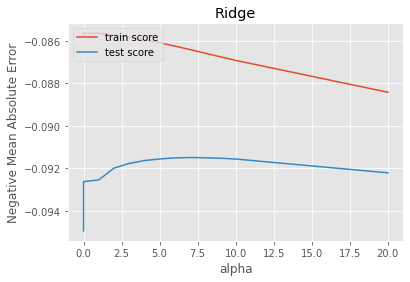

In [40]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Ridge")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [41]:
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.09511241,  0.05991601,  0.0045131 ,  0.00744525,  0.00086298,
        0.00829896,  0.05015695,  0.04066095,  0.00315476,  0.07096957,
        0.05863576, -0.07215869,  0.06194867,  0.07343066,  0.10648346,
        0.02006965,  0.11732869,  0.1205202 , -0.056546  , -0.05224311,
        0.08203457,  0.09519585,  0.1056767 ,  0.06380041,  0.05720048,
        0.07169436,  0.03590618,  0.0406391 ,  0.01671052, -0.10923052,
       -0.01570351, -0.05270992,  0.0828246 , -0.00050779,  0.0019502 ,
        0.00477252, -0.01570351, -0.00050779,  0.02263732,  0.        ,
       -0.00782787, -0.06534294,  0.05085508, -0.03783961, -0.00272019,
        0.        ,  0.00277561,  0.02398221, -0.03443512, -0.04426233,
       -0.08885323, -0.05504423,  0.06706007, -0.03967882, -0.08885323,
       -0.0624884 , -0.02040611, -0.06307494, -0.05031818,  0.01162998,
        0.01162998,  0.02227789,  0.02301349,  0.05459345,  0.03879061,
        0.0138404 , -0.00666349,  0.03610762,  0.05835194,  0.03

### Lasso Regression

In [42]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [43]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<= 0.02]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.053491,0.018939,0.000999,0.001264,0.0001,{'alpha': 0.0001},-0.092754,-0.095157,-0.100549,-0.083064,-0.094289,-0.093162,0.005688,2,-0.088749,-0.077457,-0.083671,-0.090279,-0.088112,-0.085654,0.004650
1,0.014893,0.002248,0.004487,0.006032,0.001,{'alpha': 0.001},-0.089680,-0.098199,-0.099497,-0.084472,-0.092232,-0.092813,0.005537,1,-0.092582,-0.081140,-0.086385,-0.092615,-0.091035,-0.088751,0.004435
2,0.004787,0.000398,0.001397,0.000797,0.01,{'alpha': 0.01},-0.098864,-0.114179,-0.109309,-0.101404,-0.106378,-0.106020,0.005480,3,-0.108949,-0.095155,-0.103200,-0.107994,-0.106650,-0.104390,0.005012


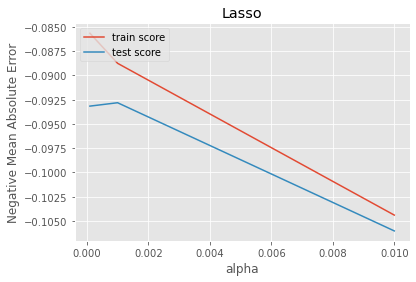

In [44]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Lasso")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [45]:
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.10489237,  0.06027458,  0.00658711,  0.00516761, -0.        ,
        0.01398324,  0.01189959,  0.        , -0.        ,  0.12043971,
        0.05548297, -0.08064051,  0.        ,  0.00343081,  0.07868557,
       -0.        ,  0.10196855,  0.11513578, -0.        , -0.        ,
        0.05380158,  0.09025141,  0.12280749,  0.01345902,  0.        ,
        0.0632587 ,  0.        ,  0.        ,  0.        , -0.11217697,
       -0.        , -0.        ,  0.06992755,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.03259672,  0.04169262, -0.        , -0.        ,
        0.        ,  0.00154861,  0.        , -0.        , -0.01437481,
       -0.10219358, -0.01951079,  0.06569708, -0.01507576, -0.00610411,
       -0.0531815 , -0.        , -0.05932735, -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.03603726,
        0.        , -0.        ,  0.        ,  0.03824898,  0.01

In [46]:
# R2 scores for Ridge regression
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)
print('R2_scores:-\n')
print('Ridge_train\n', r2_score(y_train, y_pred_ridge_train))
print('Ridge_test\n', r2_score(y_test, y_pred_ridge_test))

R2_scores:-

Ridge_train
 0.8895159973391714
Ridge_test
 0.8821611258274724


In [47]:
# R2 scores for Lasso regression
print('R2_scores:-\n')
print('Lasso_train\n', r2_score(y_train, y_pred_lasso_train))
print('Lasso_test\n', r2_score(y_test, y_pred_lasso_test))

R2_scores:-

Lasso_train
 0.8812735558740777
Lasso_test
 0.8807581912251762


In [48]:
# Top 10 features with +ve coefficients for Ridge regression
ridge_col = list(zip(X.columns, list(ridge.coef_)))
ridge_coef = pd.DataFrame(ridge_col)
ridge_coef = ridge_coef.rename(columns = {0:'Var',1: 'Coeff'})
ridge_coef_pos = ridge_coef.sort_values(by=['Coeff'], ascending = False)
ridge_coef_neg = ridge_coef.sort_values(by=['Coeff'], ascending = True)
ridge_coef_pos.head(10)

,Var,Coeff
17,FullBath,0.120520
16,BsmtHalfBath,0.117329
14,GrLivArea,0.106483
22,Fireplaces,0.105677
21,TotRmsAbvGrd,0.095196
0,MSSubClass,0.095112
32,MoSold,0.082825
20,KitchenAbvGr,0.082035
13,LowQualFinSF,0.073431
25,WoodDeckSF,0.071694


In [49]:
# Top 10 features with -ve coefficients for Ridge regression
ridge_coef_neg.head(10)

,Var,Coeff
29,ScreenPorch,-0.109231
50,Neighborhood_ClearCr,-0.088853
54,Neighborhood_Gilbert,-0.088853
11,1stFlrSF,-0.072159
41,LotShape_IR3,-0.065343
57,Neighborhood_Mitchel,-0.063075
55,Neighborhood_IDOTRR,-0.062488
18,HalfBath,-0.056546
51,Neighborhood_CollgCr,-0.055044
31,MiscVal,-0.052710


In [50]:
# Top 10 features with +ve coefficients for Lasso regression
lasso_col = list(zip(X.columns, list(lasso.coef_)))
lasso_coef = pd.DataFrame(lasso_col)
lasso_coef = lasso_coef.rename(columns = {0:'Var',1: 'Coeff'})
lasso_coef_pos = lasso_coef.sort_values(by=['Coeff'], ascending = False)
lasso_coef_neg = lasso_coef.sort_values(by=['Coeff'], ascending = True)
lasso_coef_pos.head(10)

,Var,Coeff
22,Fireplaces,0.122807
9,TotalBsmtSF,0.120440
17,FullBath,0.115136
0,MSSubClass,0.104892
16,BsmtHalfBath,0.101969
21,TotRmsAbvGrd,0.090251
14,GrLivArea,0.078686
32,MoSold,0.069928
52,Neighborhood_Crawfor,0.065697
25,WoodDeckSF,0.063259


In [51]:
# Top 10 features with -ve coefficients for Lasso regression
lasso_coef_neg.head(10)

,Var,Coeff
29,ScreenPorch,-0.112177
50,Neighborhood_ClearCr,-0.102194
11,1stFlrSF,-0.080641
57,Neighborhood_Mitchel,-0.059327
55,Neighborhood_IDOTRR,-0.053181
41,LotShape_IR3,-0.032597
51,Neighborhood_CollgCr,-0.019511
53,Neighborhood_Edwards,-0.015076
49,Neighborhood_BrkSide,-0.014375
54,Neighborhood_Gilbert,-0.006104


### Conclusion

1. All the significant varibales effecting the price were found and classified as per their coefficients.
2. To benefit from the results obtained the company can concentrate on the negative parameters while buying houses and positive parameters while selling them.
3. The optimum values of lambda for Ridge and Lasso were found to be 7 and 0.001 respectively.
4. The metric (R2_score) for the test-set looks good for both Ridge and Lasso regressions:

    Ridge_test:     0.882
    
    Lasso_test:     0.880